In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import tensorflow.keras.backend as K
!pip install split-folders
import splitfolders
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
print(os.getcwd(), os.listdir())
DIR = '/content/drive/MyDrive/lung-cancer-detection-main/rawData'
CATS = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

DEST_DIR = '/content/drive/MyDrive/lung-cancer-detection-main/data'

/content ['.config', 'adenocarcinoma86.png', 'adenocarcinoma238.png', 'adenocarcinoma170.png', 'adenocarcinoma215.png', 'adenocarcinoma142.png', 'adenocarcinoma244.png', 'adenocarcinoma81.png', 'adenocarcinoma59.png', 'adenocarcinoma338.png', 'adenocarcinoma247.png', 'adenocarcinoma231.png', 'adenocarcinoma246.png', 'adenocarcinoma150.png', 'adenocarcinoma171.png', 'adenocarcinoma285.png', 'adenocarcinoma39.png', 'adenocarcinoma75.png', 'adenocarcinoma128.png', 'adenocarcinoma68.png', 'adenocarcinoma177.png', 'adenocarcinoma61.png', 'adenocarcinoma43.png', 'adenocarcinoma262.png', 'adenocarcinoma230.png', 'adenocarcinoma192.png', 'adenocarcinoma205.png', 'adenocarcinoma253.png', 'adenocarcinoma286.png', 'adenocarcinoma87.png', 'adenocarcinoma104.png', 'adenocarcinoma34.png', 'adenocarcinoma53.png', 'adenocarcinoma293.png', 'adenocarcinoma276.png', 'adenocarcinoma251.png', 'adenocarcinoma89.png', 'adenocarcinoma174.png', 'adenocarcinoma21.png', 'adenocarcinoma273.png', 'adenocarcinoma11

In [ ]:
!unzip /content/drive/MyDrive/rawData.zip -d /content


unzip:  cannot find or open /content/drive/MyDrive/rawData.zip, /content/drive/MyDrive/rawData.zip.zip or /content/drive/MyDrive/rawData.zip.ZIP.


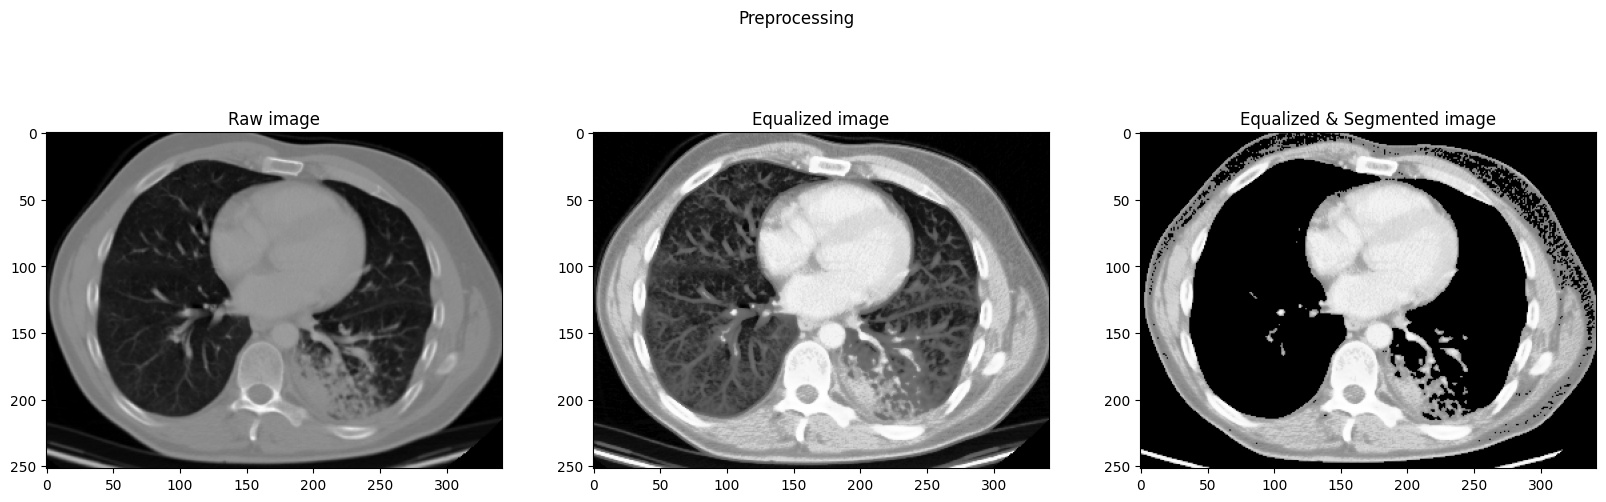

In [ ]:
img = cv2.imread('/content/drive/MyDrive/lung-cancer-detection-main/rawData/squamous.cell.carcinoma1.png', 0)
equalizedImage = cv2.equalizeHist(img)
e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Raw image')

ax2 = plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
ax2.set_title('Equalized image')

ax3 = plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(segmentedImage, cv2.COLOR_BGR2RGB))
ax3.set_title('Equalized & Segmented image')

plt.suptitle('Preprocessing')

plt.show()

In [ ]:
if not os.path.exists(DEST_DIR):
    !mkdir data && cd data && mkdir cancerous && mkdir non-cancerous

for category in CATS:
    path = os.path.join(DIR, category)
    for image in os.listdir(path):
        curr = os.path.join(path, image)
        img = cv2.imread(curr, 0)
        equalizedImage = cv2.equalizeHist(img)
        e, segmentedImage = cv2.threshold(equalizedImage, 128, 255, cv2.THRESH_TOZERO)
        if category == 'normal':
            imgDest = curr.replace('/content/drive/MyDrive/lung-cancer-detection-main/rawData/normal', '/content/drive/MyDrive/lung-cancer-detection-main/data/non-cancerous')
            cv2.imwrite(imgDest, segmentedImage)
        else:
            imgDest = curr.replace('/content/drive/MyDrive/lung-cancer-detection-main/rawData/adenocarcinoma', '/content/drive/MyDrive/lung-cancer-detection-main/data/cancerous')
            imgDest = imgDest.replace('/content/drive/MyDrive/lung-cancer-detection-main/rawData/large.cell.carcinoma', '/content/drive/MyDrive/lung-cancer-detection-main/data/cancerous')
            imgDest = imgDest.replace('/content/drive/MyDrive/lung-cancer-detection-main/rawData/squamous.cell.carcinoma', '/content/drive/MyDrive/lung-cancer-detection-main/data/cancerous')
            cv2.imwrite(imgDest, segmentedImage)
print("Processed data directory created successfully at", DEST_DIR)

Processed data directory created successfully at /content/drive/MyDrive/lung-cancer-detection-main/data


Comparison between processed and unprocessed image

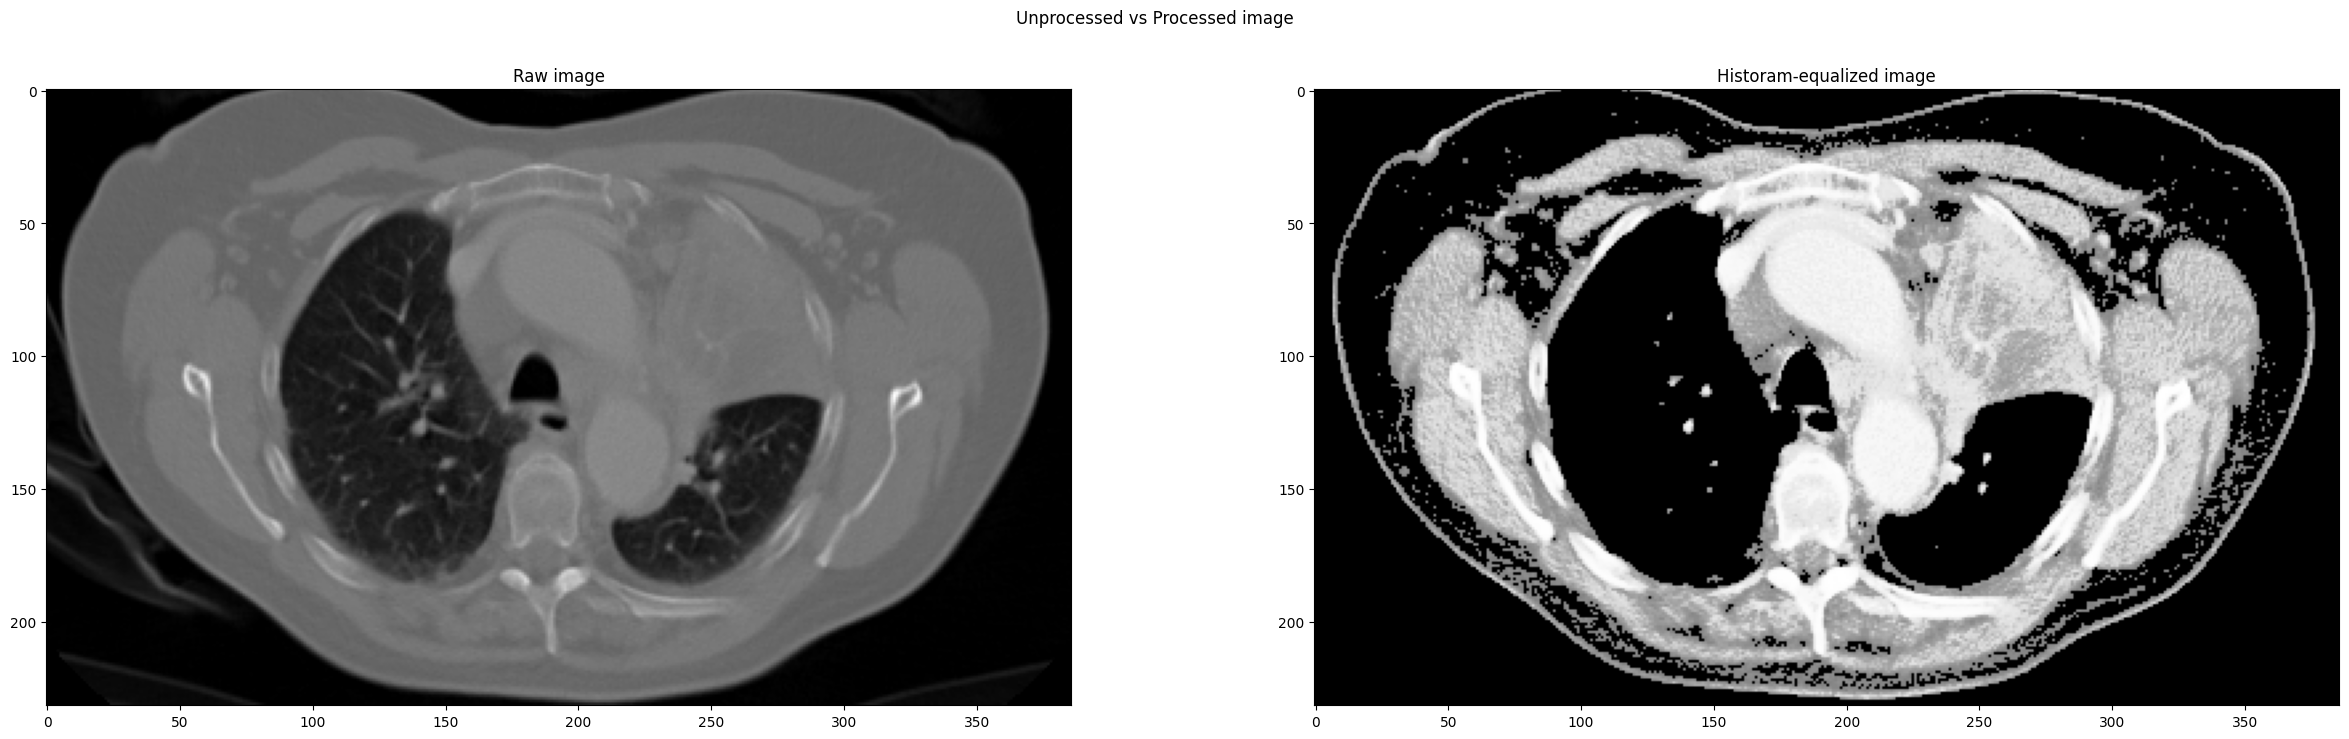

In [ ]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(os.path.join(DIR, CATS[0], 'adenocarcinoma10.png')))
plt.title('Raw image')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(os.path.join(DEST_DIR,'cancerous', 'adenocarcinoma10.png')))
plt.title('Historam-equalized image')
plt.suptitle('Unprocessed vs Processed image')
plt.show()

In [ ]:
FINAL_DIR = '/content/drive/MyDrive/lung-cancer-detection-main/processedData'

splitfolders.ratio(DEST_DIR, output=FINAL_DIR, seed=69420, ratio=(.7, 0.1,0.2))

Copying files: 1000 files [04:30,  3.70 files/s]


In [ ]:
BATCH_SIZE=32


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2,
                                                                rotation_range=5,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='nearest'
                                                                )

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

test_datagen  = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset  = train_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/processedData/train',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 699 images belonging to 2 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/processedData/val',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 99 images belonging to 2 classes.


In [ ]:
test_dataset = test_datagen.flow_from_directory(directory = '/content/drive/MyDrive/lung-cancer-detection-main/processedData/test',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 32)

Found 202 images belonging to 2 classes.


In [ ]:
def F1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='Accuracy'),
      tf.keras.metrics.Precision(name='Precision'),
      tf.keras.metrics.Recall(name='Recall'),
      tf.keras.metrics.AUC(name='AUC'),
      F1,
]

def plot_history(hist, name):
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].plot(hist.history['Accuracy'])
  axs[0].plot(hist.history['val_Accuracy'])
  axs[0].set_title(f'{name} Accuracy')
  axs[0].set_ylabel('Accuracy')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['train', 'val', 'F1', 'Recall'], loc='upper left')

  axs[1].plot(hist.history['loss'])
  axs[1].plot(hist.history['val_loss'])
  axs[1].set_title(f'{name} Loss')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['train', 'val'], loc='upper left')

  axs[2].plot(hist.history['Precision'])
  axs[2].plot(hist.history['val_Precision'])
  axs[2].set_title(f'{name} Precision')
  axs[2].set_ylabel('Precision')
  axs[2].set_xlabel('Epoch')
  axs[2].legend(['train', 'val'], loc='upper left')

  plt.show()


In [ ]:
CNN = tf.keras.Sequential()
CNN.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
CNN.add(tf.keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
CNN.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Flatten())
CNN.add(tf.keras.layers.Dense(units=64, activation='relu'))
CNN.add(tf.keras.layers.Dropout(rate=0.25))
CNN.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

CNN.summary()

CNN.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

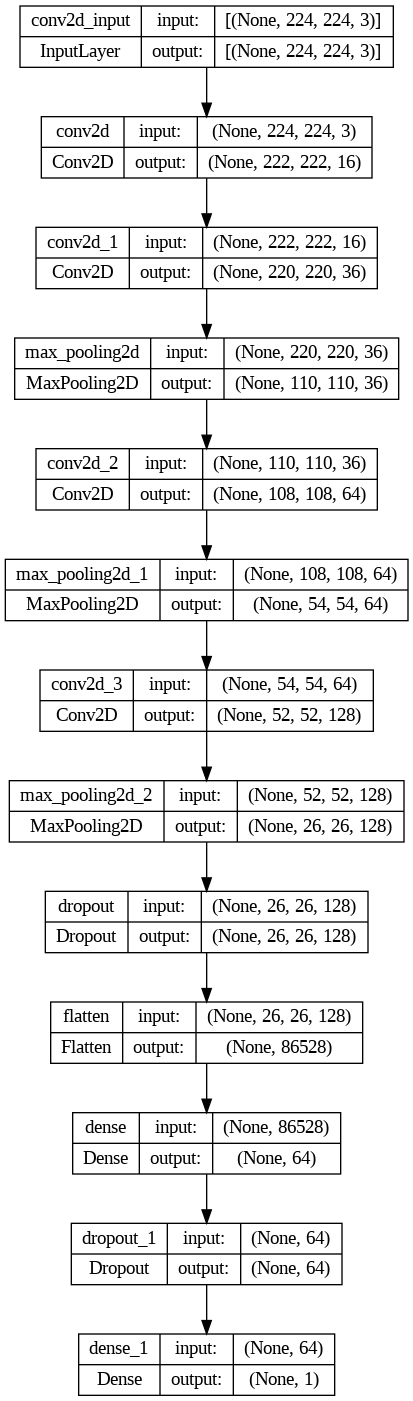

In [ ]:
tf.keras.utils.plot_model(CNN, to_file='CNN.png', show_shapes=True,show_layer_names=True)

In [ ]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('CNN.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

CNN_history = CNN.fit(train_dataset,validation_data=valid_dataset, epochs = 36,verbose = 1, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/36
22/22 [==============================] - ETA: 0s - loss: 0.2437 - Accuracy: 0.9027 - Precision: 0.8475 - Recall: 0.6667 - AUC: 0.9462 - F1: 0.7407


22/22 [==============================] - 119s 5s/step - loss: 0.2437 - Accuracy: 0.9027 - Precision: 0.8475 - Recall: 0.6667 - AUC: 0.9462 - F1: 0.7407 - val_loss: 0.4126 - val_Accuracy: 0.7879 - val_Precision: 0.5000 - val_Recall: 1.0000 - val_AUC: 0.9780 - val_F1: 0.5150 - lr: 0.0010
Epoch 2/36
22/22 [==============================] - ETA: 0s - loss: 0.2354 - Accuracy: 0.9027 - Precision: 0.8306 - Recall: 0.6867 - AUC: 0.9482 - F1: 0.7510


22/22 [==============================] - 119s 5s/step - loss: 0.2354 - Accuracy: 0.9027 - Precision: 0.8306 - Recall: 0.6867 - AUC: 0.9482 - F1: 0.7510 - val_loss: 0.3186 - val_Accuracy: 0.8687 - val_Precision: 0.6176 - val_Recall: 1.0000 - val_AUC: 0.9881 - val_F1: 0.7891 - lr: 0.0010
Epoch 3/36
22/22 [==============================] - ETA: 0s - loss: 0.2319 - Accuracy: 0.8970 - Precision: 0.8197 - Recall: 0.6667 - AUC: 0.9482 - F1: 0.7048


22/22 [==============================] - 116s 5s/step - loss: 0.2319 - Accuracy: 0.8970 - Precision: 0.8197 - Recall: 0.6667 - AUC: 0.9482 - F1: 0.7048 - val_loss: 0.2399 - val_Accuracy: 0.8889 - val_Precision: 0.6562 - val_Recall: 1.0000 - val_AUC: 0.9933 - val_F1: 0.5705 - lr: 0.0010
Epoch 4/36
22/22 [==============================] - ETA: 0s - loss: 0.2205 - Accuracy: 0.9027 - Precision: 0.8361 - Recall: 0.6800 - AUC: 0.9590 - F1: 0.7316


22/22 [==============================] - 116s 5s/step - loss: 0.2205 - Accuracy: 0.9027 - Precision: 0.8361 - Recall: 0.6800 - AUC: 0.9590 - F1: 0.7316 - val_loss: 0.1799 - val_Accuracy: 0.9091 - val_Precision: 0.7000 - val_Recall: 1.0000 - val_AUC: 0.9933 - val_F1: 0.8520 - lr: 0.0010
Epoch 5/36
22/22 [==============================] - ETA: 0s - loss: 0.2175 - Accuracy: 0.9127 - Precision: 0.8397 - Recall: 0.7333 - AUC: 0.9613 - F1: 0.7856


22/22 [==============================] - 131s 6s/step - loss: 0.2175 - Accuracy: 0.9127 - Precision: 0.8397 - Recall: 0.7333 - AUC: 0.9613 - F1: 0.7856 - val_loss: 0.0781 - val_Accuracy: 0.9596 - val_Precision: 0.9474 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.7040 - lr: 0.0010
Epoch 6/36
22/22 [==============================] - ETA: 0s - loss: 0.2190 - Accuracy: 0.9041 - Precision: 0.8487 - Recall: 0.6733 - AUC: 0.9572 - F1: 0.7336


22/22 [==============================] - 117s 5s/step - loss: 0.2190 - Accuracy: 0.9041 - Precision: 0.8487 - Recall: 0.6733 - AUC: 0.9572 - F1: 0.7336 - val_loss: 0.3681 - val_Accuracy: 0.8384 - val_Precision: 0.5676 - val_Recall: 1.0000 - val_AUC: 0.9756 - val_F1: 0.6760 - lr: 0.0010
Epoch 7/36
22/22 [==============================] - ETA: 0s - loss: 0.2082 - Accuracy: 0.9142 - Precision: 0.8358 - Recall: 0.7467 - AUC: 0.9647 - F1: 0.7888


22/22 [==============================] - 116s 5s/step - loss: 0.2082 - Accuracy: 0.9142 - Precision: 0.8358 - Recall: 0.7467 - AUC: 0.9647 - F1: 0.7888 - val_loss: 0.1141 - val_Accuracy: 0.9596 - val_Precision: 0.8400 - val_Recall: 1.0000 - val_AUC: 0.9988 - val_F1: 0.6863 - lr: 0.0010
Epoch 8/36
22/22 [==============================] - ETA: 0s - loss: 0.2067 - Accuracy: 0.8970 - Precision: 0.8047 - Recall: 0.6867 - AUC: 0.9612 - F1: 0.7176
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.



22/22 [==============================] - 120s 5s/step - loss: 0.2067 - Accuracy: 0.8970 - Precision: 0.8047 - Recall: 0.6867 - AUC: 0.9612 - F1: 0.7176 - val_loss: 0.1226 - val_Accuracy: 0.9697 - val_Precision: 0.8750 - val_Recall: 1.0000 - val_AUC: 0.9973 - val_F1: 0.9208 - lr: 0.0010
Epoch 8: early stopping


In [ ]:
CNN_scores = CNN.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 14s 2s/step - loss: 0.1169 - Accuracy: 0.9505 - Precision: 0.8542 - Recall: 0.9318 - AUC: 0.9894 - F1: 0.8948


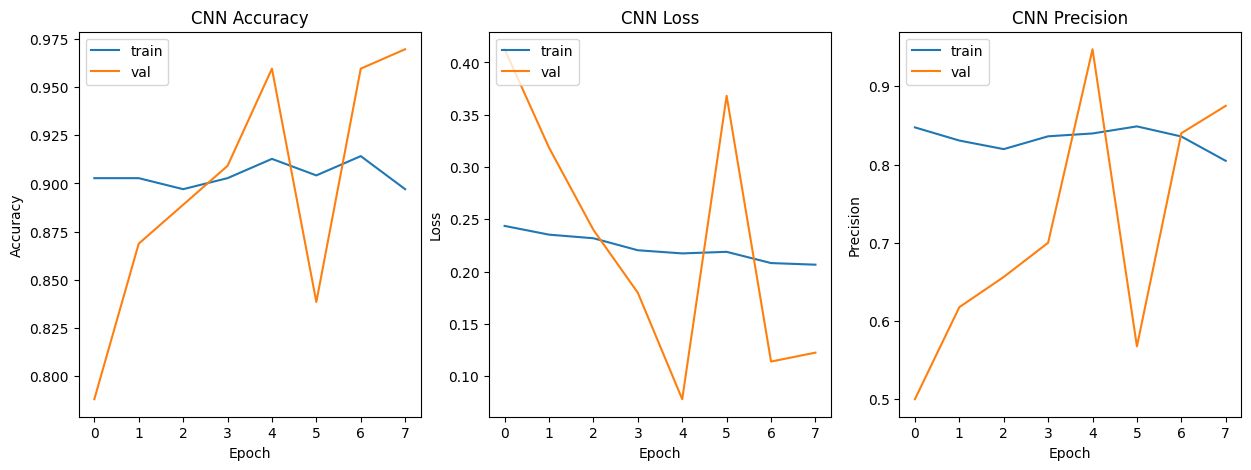

In [ ]:
plot_history(CNN_history, 'CNN')

VGG16

In [ ]:
VGG16_base = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in VGG16_base.layers:
    layer.trainable = False

VGG16=tf.keras.Sequential()
VGG16.add(VGG16_base)
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Flatten())
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dropout(0.5))
VGG16.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
VGG16.add(tf.keras.layers.BatchNormalization())
VGG16.add(tf.keras.layers.Activation('relu'))
VGG16.add(tf.keras.layers.Dense(1,activation='sigmoid'))

VGG16.summary()

VGG16.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 32)                802848    
                                                                 
 batch_normalization_1 (Bat  (None, 32)                

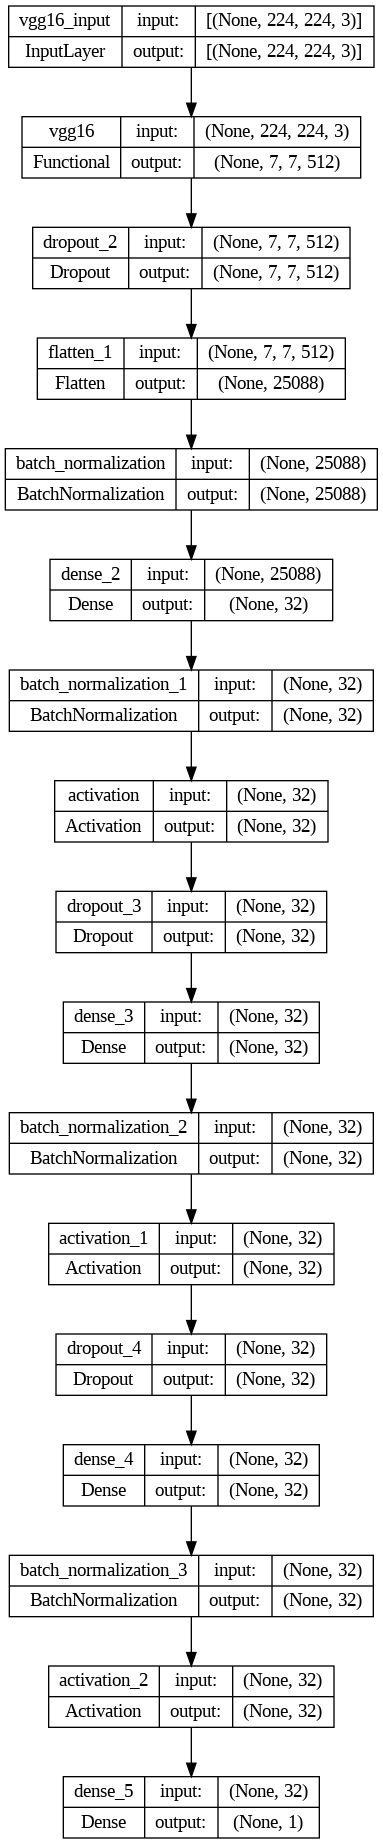

In [ ]:
tf.keras.utils.plot_model(VGG16, to_file='VGG16.png', show_shapes=True,show_layer_names=True)

In [35]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('VGG16.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

VGG16_history = VGG16.fit(train_dataset,validation_data=valid_dataset, epochs = 10, callbacks=[lrd,mcp,es], shuffle=True)

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 0.2473 - Accuracy: 0.9027 - Precision: 0.8254 - Recall: 0.6933 - AUC: 0.9445 - F1: 0.7570 


22/22 [==============================] - 451s 21s/step - loss: 0.2473 - Accuracy: 0.9027 - Precision: 0.8254 - Recall: 0.6933 - AUC: 0.9445 - F1: 0.7570 - val_loss: 0.1356 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9976 - val_F1: 0.9643 - lr: 0.0010
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.2505 - Accuracy: 0.9070 - Precision: 0.8058 - Recall: 0.7467 - AUC: 0.9398 - F1: 0.7597 


22/22 [==============================] - 418s 19s/step - loss: 0.2505 - Accuracy: 0.9070 - Precision: 0.8058 - Recall: 0.7467 - AUC: 0.9398 - F1: 0.7597 - val_loss: 0.1213 - val_Accuracy: 0.9798 - val_Precision: 1.0000 - val_Recall: 0.9048 - val_AUC: 0.9945 - val_F1: 0.7106 - lr: 0.0010
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.2409 - Accuracy: 0.9056 - Precision: 0.8134 - Recall: 0.7267 - AUC: 0.9413 - F1: 0.7592 


22/22 [==============================] - 450s 21s/step - loss: 0.2409 - Accuracy: 0.9056 - Precision: 0.8134 - Recall: 0.7267 - AUC: 0.9413 - F1: 0.7592 - val_loss: 0.1133 - val_Accuracy: 0.9697 - val_Precision: 1.0000 - val_Recall: 0.8571 - val_AUC: 0.9963 - val_F1: 0.6833 - lr: 0.0010
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.2528 - Accuracy: 0.9213 - Precision: 0.8626 - Recall: 0.7533 - AUC: 0.9348 - F1: 0.8075 


22/22 [==============================] - 450s 21s/step - loss: 0.2528 - Accuracy: 0.9213 - Precision: 0.8626 - Recall: 0.7533 - AUC: 0.9348 - F1: 0.8075 - val_loss: 0.1139 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9930 - val_F1: 0.9722 - lr: 0.0010
Epoch 5/10
22/22 [==============================] - ETA: 0s - loss: 0.2070 - Accuracy: 0.9256 - Precision: 0.8356 - Recall: 0.8133 - AUC: 0.9573 - F1: 0.8182 


22/22 [==============================] - 450s 21s/step - loss: 0.2070 - Accuracy: 0.9256 - Precision: 0.8356 - Recall: 0.8133 - AUC: 0.9573 - F1: 0.8182 - val_loss: 0.1056 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9902 - val_F1: 0.7353 - lr: 0.0010
Epoch 6/10
22/22 [==============================] - ETA: 0s - loss: 0.2360 - Accuracy: 0.9156 - Precision: 0.8138 - Recall: 0.7867 - AUC: 0.9450 - F1: 0.7922 


22/22 [==============================] - 450s 21s/step - loss: 0.2360 - Accuracy: 0.9156 - Precision: 0.8138 - Recall: 0.7867 - AUC: 0.9450 - F1: 0.7922 - val_loss: 0.1080 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9927 - val_F1: 0.7143 - lr: 0.0010
Epoch 7/10
22/22 [==============================] - ETA: 0s - loss: 0.1870 - Accuracy: 0.9356 - Precision: 0.8777 - Recall: 0.8133 - AUC: 0.9699 - F1: 0.8400 


22/22 [==============================] - 450s 21s/step - loss: 0.1870 - Accuracy: 0.9356 - Precision: 0.8777 - Recall: 0.8133 - AUC: 0.9699 - F1: 0.8400 - val_loss: 0.0985 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9915 - val_F1: 0.9773 - lr: 0.0010
Epoch 8/10
22/22 [==============================] - ETA: 0s - loss: 0.2164 - Accuracy: 0.9084 - Precision: 0.8413 - Recall: 0.7067 - AUC: 0.9580 - F1: 0.7779 


22/22 [==============================] - 420s 19s/step - loss: 0.2164 - Accuracy: 0.9084 - Precision: 0.8413 - Recall: 0.7067 - AUC: 0.9580 - F1: 0.7779 - val_loss: 0.0859 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9905 - val_F1: 0.7143 - lr: 0.0010
Epoch 9/10
22/22 [==============================] - ETA: 0s - loss: 0.1803 - Accuracy: 0.9313 - Precision: 0.8643 - Recall: 0.8067 - AUC: 0.9713 - F1: 0.8300 


22/22 [==============================] - 420s 19s/step - loss: 0.1803 - Accuracy: 0.9313 - Precision: 0.8643 - Recall: 0.8067 - AUC: 0.9713 - F1: 0.8300 - val_loss: 0.0812 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9902 - val_F1: 0.9773 - lr: 0.0010
Epoch 10/10
22/22 [==============================] - ETA: 0s - loss: 0.1739 - Accuracy: 0.9385 - Precision: 0.8794 - Recall: 0.8267 - AUC: 0.9753 - F1: 0.8449 


22/22 [==============================] - 449s 21s/step - loss: 0.1739 - Accuracy: 0.9385 - Precision: 0.8794 - Recall: 0.8267 - AUC: 0.9753 - F1: 0.8449 - val_loss: 0.0743 - val_Accuracy: 0.9899 - val_Precision: 1.0000 - val_Recall: 0.9524 - val_AUC: 0.9911 - val_F1: 0.7333 - lr: 0.0010


In [39]:
VGG16_scores = VGG16.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 111s 16s/step - loss: 0.0636 - Accuracy: 0.9802 - Precision: 0.9167 - Recall: 1.0000 - AUC: 0.9997 - F1: 0.9591


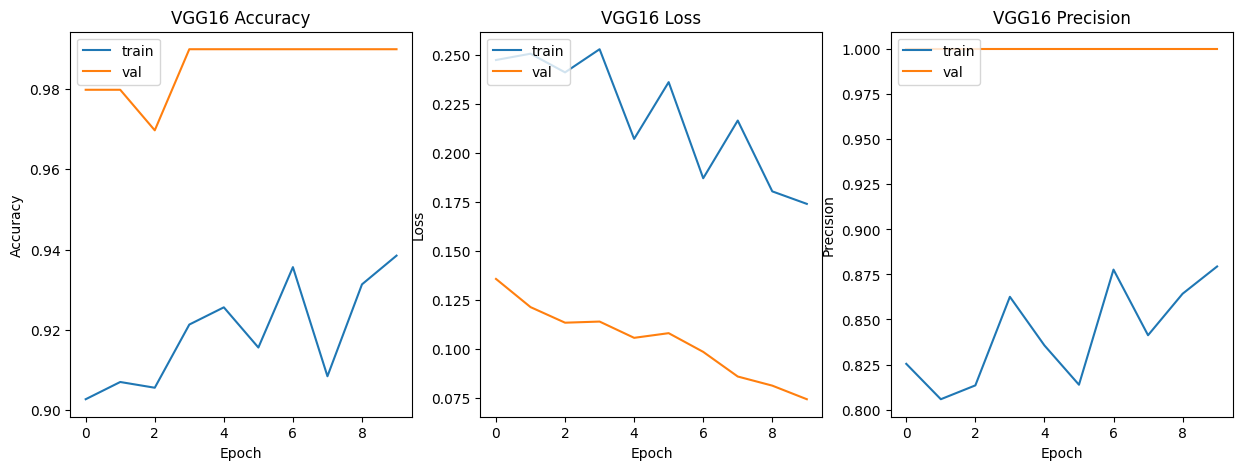

In [40]:
plot_history(VGG16_history, 'VGG16')

ResNet50

In [42]:
ResNet50_base = tf.keras.applications.ResNet50(input_shape=(224,224,3),include_top=False,weights="imagenet")

for layer in ResNet50_base.layers:
    layer.trainable = False

ResNet50=tf.keras.Sequential()
ResNet50.add(ResNet50_base)
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Flatten())
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dropout(0.5))
ResNet50.add(tf.keras.layers.Dense(32,kernel_initializer='he_uniform'))
ResNet50.add(tf.keras.layers.BatchNormalization())
ResNet50.add(tf.keras.layers.Activation('relu'))
ResNet50.add(tf.keras.layers.Dense(1,activation='sigmoid'))

ResNet50.summary()

ResNet50.compile(optimizer='rmsprop',
              loss=tf.keras.losses.binary_crossentropy, metrics=METRICS)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_4 (Bat  (None, 100352)            401408    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 32)                3211296   
                                                                 
 batch_normalization_5 (Bat  (None, 32)                

In [43]:
lrd = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',patience = 3,verbose = 1,factor = 0.50, min_lr = 1e-7)

mcp = tf.keras.callbacks.ModelCheckpoint('ResNet50.h5', save_best_only=True, mode='auto', monitor='val_accuracy')

es = tf.keras.callbacks.EarlyStopping(verbose=1, patience=3)

ResNet50_history = ResNet50.fit(train_dataset,validation_data=valid_dataset,epochs = 5,verbose = 1, callbacks=[lrd, mcp, es], shuffle=True)

Epoch 1/5
22/22 [==============================] - ETA: 0s - loss: 0.5943 - Accuracy: 0.7503 - Precision: 0.4346 - Recall: 0.5309 - AUC: 0.7721 - F1: 0.3362


22/22 [==============================] - 152s 7s/step - loss: 0.5943 - Accuracy: 0.7503 - Precision: 0.4346 - Recall: 0.5309 - AUC: 0.7721 - F1: 0.3362 - val_loss: 0.4941 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.6920 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 2/5
22/22 [==============================] - ETA: 0s - loss: 0.5384 - Accuracy: 0.7725 - Precision: 0.4471 - Recall: 0.2533 - AUC: 0.6756 - F1: 0.3252


22/22 [==============================] - 148s 7s/step - loss: 0.5384 - Accuracy: 0.7725 - Precision: 0.4471 - Recall: 0.2533 - AUC: 0.6756 - F1: 0.3252 - val_loss: 0.4199 - val_Accuracy: 0.7879 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8822 - val_F1: 0.0000e+00 - lr: 0.0010
Epoch 3/5
22/22 [==============================] - ETA: 0s - loss: 0.4923 - Accuracy: 0.7954 - Precision: 0.5593 - Recall: 0.2200 - AUC: 0.7196 - F1: 0.3195


22/22 [==============================] - 145s 7s/step - loss: 0.4923 - Accuracy: 0.7954 - Precision: 0.5593 - Recall: 0.2200 - AUC: 0.7196 - F1: 0.3195 - val_loss: 0.4212 - val_Accuracy: 0.7980 - val_Precision: 1.0000 - val_Recall: 0.0476 - val_AUC: 0.9026 - val_F1: 0.0625 - lr: 0.0010
Epoch 4/5
22/22 [==============================] - ETA: 0s - loss: 0.4620 - Accuracy: 0.8097 - Precision: 0.6977 - Recall: 0.2000 - AUC: 0.7444 - F1: 0.3041


22/22 [==============================] - 149s 7s/step - loss: 0.4620 - Accuracy: 0.8097 - Precision: 0.6977 - Recall: 0.2000 - AUC: 0.7444 - F1: 0.3041 - val_loss: 0.3437 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.9237 - val_F1: 0.2705 - lr: 0.0010
Epoch 5/5
22/22 [==============================] - ETA: 0s - loss: 0.4463 - Accuracy: 0.8097 - Precision: 0.6889 - Recall: 0.2067 - AUC: 0.7678 - F1: 0.2916


22/22 [==============================] - 144s 7s/step - loss: 0.4463 - Accuracy: 0.8097 - Precision: 0.6889 - Recall: 0.2067 - AUC: 0.7678 - F1: 0.2916 - val_loss: 0.3218 - val_Accuracy: 0.8283 - val_Precision: 1.0000 - val_Recall: 0.1905 - val_AUC: 0.9313 - val_F1: 0.2556 - lr: 0.0010


In [44]:
ResNet50_scores = ResNet50.evaluate(test_dataset, verbose=1)

7/7 [==============================] - 36s 5s/step - loss: 0.3094 - Accuracy: 0.8812 - Precision: 0.9545 - Recall: 0.4773 - AUC: 0.9422 - F1: 0.5736


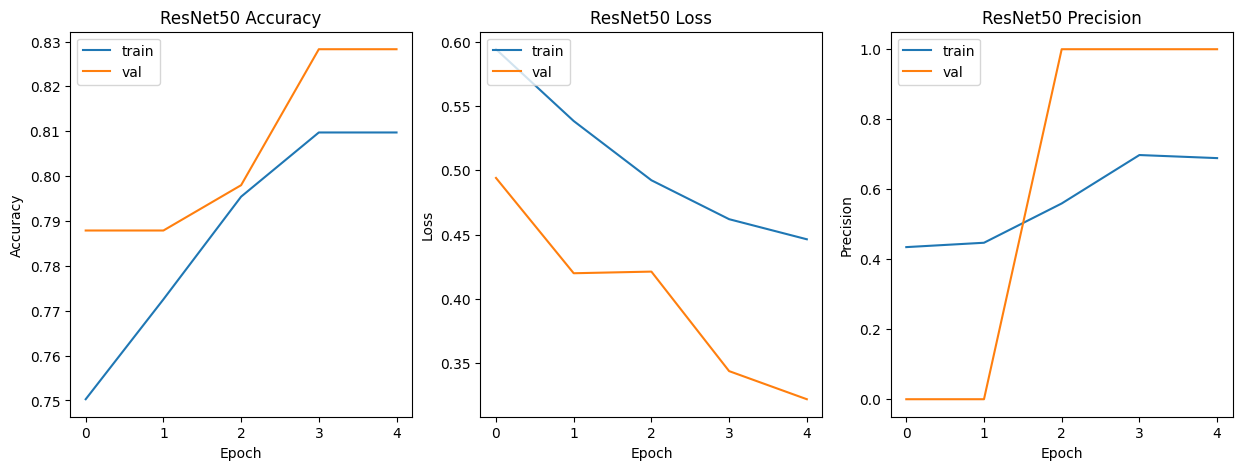

In [46]:
plot_history(ResNet50_history, 'ResNet50')

In [49]:
eval = [CNN_scores, VGG16_scores,  ResNet50_scores]
eval

[[0.1169193834066391,
  0.9504950642585754,
  0.8541666865348816,
  0.9318181872367859,
  0.9893555641174316,
  0.8948412537574768],
 [0.0635884702205658,
  0.9801980257034302,
  0.9166666865348816,
  1.0,
  0.9997122883796692,
  0.9590859413146973],
 [0.3094429671764374,
  0.8811880946159363,
  0.9545454382896423,
  0.47727271914482117,
  0.9422468543052673,
  0.5735827088356018]]

Comparative analysis of the models

In [50]:
indices = ['CNN', 'VGG16',  'ResNet']
scores = pd.DataFrame({'Accuracy': [item[1] for item in eval],'Precision': [item[2] for item in eval], 'Recall': [item[3] for item in eval], 'AUC': [item[4] for item in eval], 'F1': [item[5] for item in eval]}, index=indices)
scores

,Accuracy,Precision,Recall,AUC,F1
CNN,0.950495,0.854167,0.931818,0.989356,0.894841
VGG16,0.980198,0.916667,1.000000,0.999712,0.959086
ResNet,0.881188,0.954545,0.477273,0.942247,0.573583


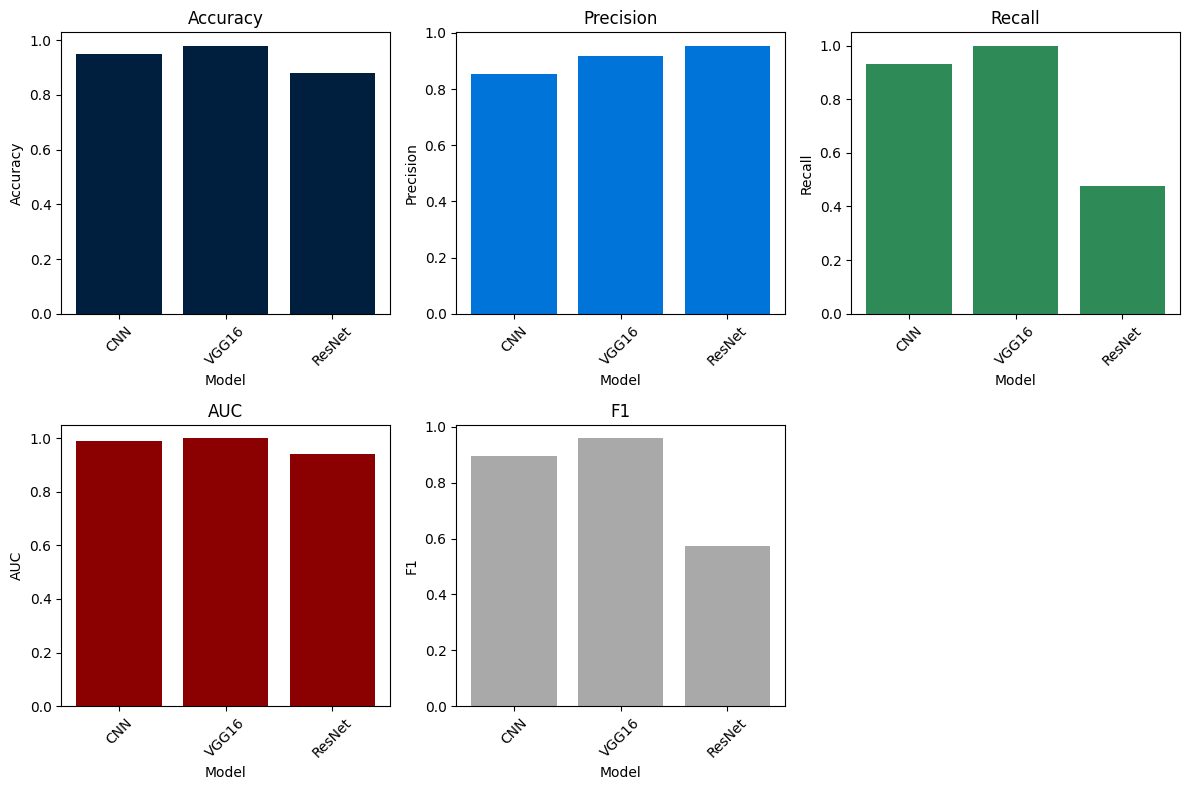

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axs = axs.ravel()

colors = ['#001f3f', '#0074D9', '#2E8B57', '#8B0000', '#A9A9A9']

for i, column in enumerate(scores.columns):
    axs[i].bar(scores.index, scores[column], color=colors[i])
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(column)
    axs[i].set_title(f'{column}')
    axs[i].tick_params(axis='x', rotation=45)

for i in range(len(scores.columns), len(axs)):
    plt.delaxes(axs[i])

plt.tight_layout()
plt.show()


In [52]:
eval = np.array(eval)
np.savetxt('eval.txt', eval)